# Importing libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Loading preprocessed data

In [15]:
X_train = pd.read_csv('../data/X_train.csv').values
X_test = pd.read_csv('../data/X_test.csv').values
y_train = pd.read_csv('../data/y_train.csv').values.ravel()  # ravel() converts it to a 1D array
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

In [16]:
print(X_train)

[[ 0.    1.    0.   ...  0.59 -0.03  0.67]
 [ 0.    1.    0.   ... -0.59 -0.65 -2.09]
 [ 0.    0.    1.   ...  0.59 -0.21 -2.09]
 ...
 [ 0.    1.    0.   ... -0.59 -0.08 -2.09]
 [ 1.    0.    0.   ... -0.59 -0.74  0.72]
 [ 0.    0.    1.   ... -0.59 -0.83  0.4 ]]


In [17]:
print(X_test)

[[ 1.    0.    0.   ...  0.59  0.89  0.67]
 [ 0.    0.    1.   ... -1.78 -1.28  0.63]
 [ 1.    0.    0.   ...  0.59 -0.14 -1.41]
 ...
 [ 1.    0.    0.   ...  0.59  0.03 -0.28]
 [ 0.    0.    1.   ...  1.78  1.63  0.72]
 [ 0.    1.    0.   ... -0.59 -0.43 -1.41]]


In [18]:
print(y_train)

[377000. 279000. 575000. ... 439000. 361050. 506000.]


In [19]:
print(y_test)

[649500. 524000. 549999. ... 435000. 819500. 349900.]


# Hyperparameter tuning for KNN


In [20]:
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Cross-validation for KNN


In [21]:
cv_scores_knn = -cross_val_score(best_knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation Scores for KNN: {cv_scores_knn}')

Cross-Validation Scores for KNN: [3.68827272e+10 2.15938394e+10 4.39218359e+10 2.04175782e+10
 1.88495430e+10]


# Predictions on test set

In [22]:
y_pred_knn = best_knn.predict(X_test)

# Evaluate KNN

In [23]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'KNN Mean Squared Error on Test Set: {mse_knn}')
print(f'KNN R2 Score on Test Set: {r2_knn}')

KNN Mean Squared Error on Test Set: 21157527099.16608
KNN R2 Score on Test Set: 0.6658511821151066


# Plotting Loss Curve for KNN

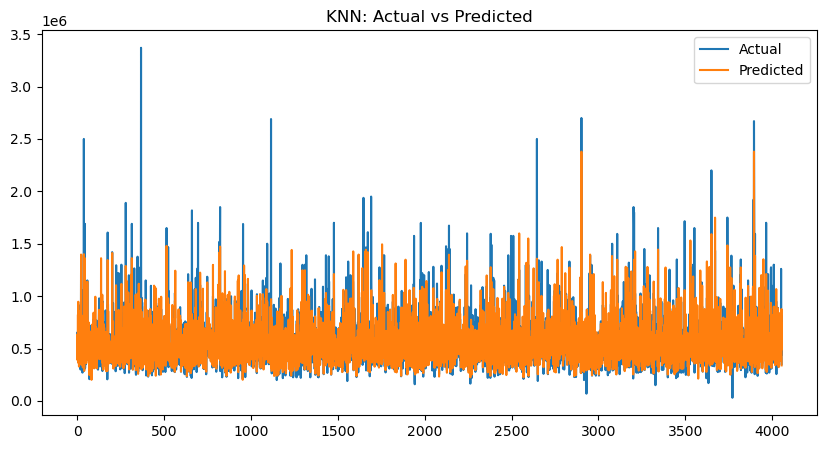

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_knn, label='Predicted')
plt.title('KNN: Actual vs Predicted')
plt.legend()
plt.show()

# Scatter Plot for KNN

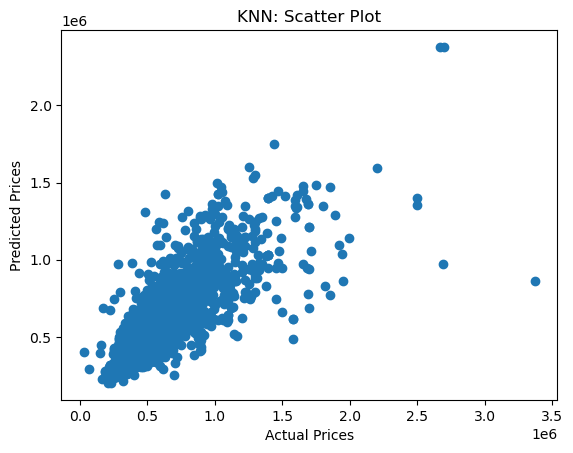

In [25]:
plt.scatter(y_test, y_pred_knn)
plt.title('KNN: Scatter Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()